In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import math

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Visuals
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

**Read test and train data into Pandas dataframes. The training dataset will be referred to as df: The test dataframe will be referred to as test_df:**

In [2]:
df = pd.read_csv('datasets/titanic/train.csv')
test_df = pd.read_csv('datasets/titanic/test.csv')
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Notice the Survived column is missing for test_df**

In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**I am going to look at information about the data iteself in the next three cells. The first cell will show statistical information about the dataframe. The second and third cells will show information about datatypes and missing values**

In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Graham, Mr. George Edward",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 **See which columns are missing values and see what the missing value count is.**

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age is missing 177 values (20 percecnt). This is the one variable you want to be accurate because age is probably an important factor. I will fill in the missing age information with an average value before running the model. Cabin is missing 77 percent of its values so that column is useless, throw it out. Embarked is missing two values, i'll just fill those two values in with the most popular embarkation point.**

## Effects of sex on survival

In [7]:
df.groupby(['Sex'])[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


**That's quite revealing regarding sex and surviveability on the titanic. Sex is, as expected an important factor. I'll take a look at that information visually.**


**As we already know sex is a key factor for survival on the Titanic. Age, and Passenger class (Pclass) are likley important as well. I'll create a key factor dataframe called kf, as well as a key factor dataframe for for survivors only called kf_survivors. I'll use these dataframes for further analysis.**


In [8]:
kf = df[['Survived', 'Pclass', 'Age', 'Sex']]
kf_survivors = kf[kf['Survived']>=1]
kf_survivors

,Survived,Pclass,Age,Sex
1,1,1,38.0,female
2,1,3,26.0,female
3,1,1,35.0,female
8,1,3,27.0,female
9,1,2,14.0,female
...,...,...,...,...
875,1,3,15.0,female
879,1,1,56.0,female
880,1,2,25.0,female
887,1,1,19.0,female


**Notice the number of rows (342) from the survivors dataframe versus the nubmer (891) of rows from the overall dataframe.**

In [9]:
all_sex = df['Sex'].value_counts()
survivor_sex = kf_survivors['Sex'].value_counts(ascending=True)
surv_percnt = survivor_sex.div(all_sex)

**Plot the data calculated above to give a visual reference of the effect on sex and survival.**

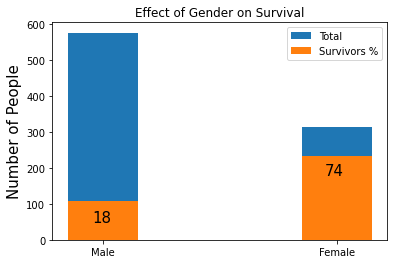

In [10]:
xpos = np.arange(len(survivor_sex))
plt.title('Effect of Gender on Survival')
plt.ylabel('Number of People', fontsize=15)
plt.bar(xpos, all_sex, width=0.3, label='Total')
plt.bar(xpos, survivor_sex, width=0.3, label='Survivors %')
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.text(-0.045,50, math.trunc(100*surv_percnt[0]),fontsize=15) 
plt.text(0.95,180, math.trunc(100*surv_percnt[1]),fontsize=15) 
plt.legend();

**This plot shows us only 18 percent of the males survived versus 74 percent of the females. Obviously, being a male on the Titanic was not a good survival trait. This plot illustrates how important of a factor sex is to this dataset.**


## Effects of age on survival

**We know from our earlier examinations of the data we are missing approximately 20 percent of the age information. Let's throw out the missing information for now and create a dataframe that contains age information.**

In [11]:
df_all_age = df.dropna(subset=['Age'])
age_column = df_all_age['Age']
df_all_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
survivors_class = kf_survivors.Pclass.value_counts()
survivors_class.sort_index(inplace=True)

**Let's take a look at this information on a line chart**

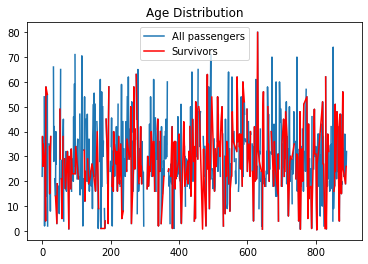

In [13]:
kf.Age.plot(kind='line', title='Age Distribution', label='All passengers');
kf_survivors.Age.plot(kind='line', title='Age Distribution', color='red', label='Survivors')
plt.legend();

**UHHHHH That's useless, maybe a line chart wasn't the best way to see this data. A histogram is a natural fit for distribution data. Let's see if we can get a histogram of the age of passengers in general versus the age of survivors.**

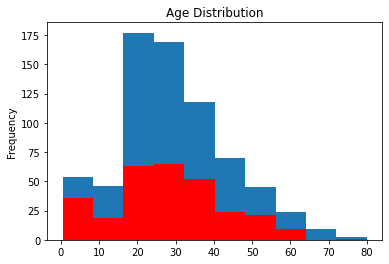

In [14]:
kf.Age.plot(kind='hist', title='Age Distribution');
kf_survivors.Age.plot(kind='hist', title='Age Distribution', color='red');

**This chart doesn't seem very helpful either. It looks like those under ten years old had a better chance at survival, but that's about it for this chart. Maybe a table will show this information in a way that is easier to read.**



**What about the 'children' in women and children first? Considering the era, a child is anyone 16 and younger. I'll also consider passenger class as well as age.**

In [15]:
age = pd.cut(kf['Age'],[0,16,80])
kf.pivot_table('Survived', ['Sex', age], 'Pclass').round(2)

Pclass              1     2     3
Sex    Age                       
female (0, 16]   0.83  1.00  0.55
       (16, 80]  0.97  0.91  0.42
male   (0, 16]   1.00  0.82  0.27
       (16, 80]  0.38  0.07  0.13

**All Children in first and second class had good survival rates. Girls in third class took a hit because of their class. Boys in third class did not do very well. Life was harsh over a hundred years ago**

## Effects of class on survival

**We took a quick look at how class affected survival rate in the table above. Let's take a closer look at the number of passengers in each class versus the number of survivors in each class and get a percentage.** 

In [16]:
total_class = df.Pclass.value_counts()
total_class.sort_index(inplace=True)

Becasue there are only three items in each of these series I will do the math for survival percentages manually

In [17]:
first_class_survival_percent = survivors_class[1]/total_class[1]
second_class_survival_percent = survivors_class[2]/total_class[2]
third_class_survival_percent = survivors_class[3]/total_class[3]

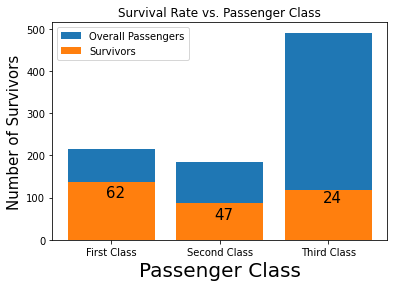

In [18]:
xpos = np.arange(len(total_class))
plt.bar(xpos, total_class, label='Overall Passengers')
plt.bar(xpos, survivors_class, label='Survivors')
plt.xticks(ticks=[0,1,2], labels=['First Class', 'Second Class', 'Third Class'])
plt.xlabel('Passenger Class', fontsize=20)
plt.ylabel('Number of Survivors', fontsize=15)
plt.title('Survival Rate vs. Passenger Class')
plt.text(-0.045,100, math.trunc(100*first_class_survival_percent),fontsize=15)
plt.text(.95,50, math.trunc(100*second_class_survival_percent),fontsize=15)
plt.text(1.95,90, math.trunc(100*third_class_survival_percent),fontsize=15)
plt.legend();


**The chart above also shows what we already knew, your survival chances were based on how much money you had.**

## Other factors that may have contributed to survival

**We have looked at the seemingly obvious catagories of Age, Sex, and Passenger Class to see the correlation to survival, now it's time to look at the less obvious catagories. Those are passengers with parents and children on board (Parch), Siblings or a spouse (Sibsp) on board and embarking location (Embarked).**

**Lets start with a survivors only database and see what we can find. The survivors only database will be referred to as 'sdf' for survivors data frame. I'll also create a died dataframe 'ddf' as this time as well.**

In [19]:
ddf = df[df['Survived']==0] #died data frame
sdf = df[df['Survived']==1] #survivors data frame
sdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


**In the next two cells i'll gather data on the total number of passengers at each embarkation point as well as the total number of survivors from each embarkation point. In the third cell i'll calculate a percentage of survivors from each embarkation point to see if there is a pattern.**

In [20]:
surv_embark = sdf['Embarked'].value_counts().to_frame()
print('Survivors')
surv_embark

Survivors


,Embarked
S,217
C,93
Q,30


In [21]:
all_embark = df['Embarked'].value_counts().to_frame()
print('All passengers')
all_embark

All passengers


,Embarked
S,644
C,168
Q,77


In [22]:
port_percentage = ((surv_embark/all_embark)*100).round(2)
print('Survivor Percentages based on Embarkation point')
port_percentage

Survivor Percentages based on Embarkation point


,Embarked
S,33.70
C,55.36
Q,38.96


**It looks like the embarkation point of 'C' or Cherbourg, France was the best place to get on board with a fifty five percent survival raite. The other two locations 'S' for Southhampton, England and 'Q' for Queenstown, Ireland have a survival rate of 34 percent and 39 percent respectively. The difference between 'S' and 'Q' isn't very big, but big enough to work with. Now lets look at the 'Parch' or parents and children on board.**


**In the next three cells I'll gather information about total numbers of passengers with parents and children on board and see if there is a pattern in the percentages of survivors with parents and children on board.**

In [23]:
total_prch = df['Parch'].value_counts().sort_index().to_frame()
print('Total')
total_prch

Total


,Parch
0,678
1,118
2,80
3,5
4,4
5,5
6,1


**The chart above tells us six hundred seventy eight people were travelling alone. One hundred eighteen people had one parent or child aboard, etc...**

**The two charts below are read the same way as the previous chart. The charts show the number of survivors with parents or children aboard. The second chart shows the number of people who died with parents or children aboard.**

In [24]:
surv_prch = sdf['Parch'].value_counts().to_frame()
print('Survivors')
surv_prch

Survivors


,Parch
0,233
1,65
2,40
3,3
5,1


In [25]:
died_prch = ddf['Parch'].value_counts().sort_index().to_frame()
print('Died')
died_prch

Died


,Parch
0,445
1,53
2,40
3,2
4,4
5,4
6,1


**Based on the output from the three cells above, a graph isn't going to work very well. Let's see what we can do presenting the information as a dataframe.**

In [26]:
died_prch_percent = abs(((died_prch/total_prch)-1)*100).round(2)
died_prch_percent

,Parch
0,34.37
1,55.08
2,50.00
3,60.00
4,0.00
5,20.00
6,0.00


**The dataframe above tells us some interesting information. Only 34 percent of those traveling without parents or children aboard survived. However if you had one, or two parents/children with you, your survival chance ranged from fifty to sixty percent.**

**Below, the left column represents the quantity of siblings/spouses on board. The right number represents how many passengers survived that were traveling with that number of siblings/spouse.**

In [27]:
all_sibsp = df['SibSp'].value_counts().sort_index()
surv_sibsp = sdf['SibSp'].value_counts().sort_index()
died_sibsp = ddf['SibSp'].value_counts().sort_index()
surv_sibsp_percent = (((died_sibsp/all_sibsp)-1).abs()*100).round(1)
s1 = pd.Series(all_sibsp)
s2 = pd.Series(surv_sibsp)
s3 = pd.Series(died_sibsp)
s4 = pd.Series(surv_sibsp_percent)
sibsp = pd.concat([s1,s2,s3,s4], keys=['Total','Lived', 'Died','% Survived','s44'],names=['Count'],axis='columns')
sibsp 

Count,Total,Lived,Died,% Survived
0,608,210.0,398,34.5
1,209,112.0,97,53.6
2,28,13.0,15,46.4
3,16,4.0,12,25.0
4,18,3.0,15,16.7
5,5,NaN,5,0.0
8,7,NaN,7,0.0


**The leftmost column shows the number of family members a passenger has traveling with them. Zero means that person is traveling alone. The rightmost column in the table above tells us the survival percentage of thoses traveling with siblings and or a spouse. The first three rows have enough data to be useful. From the second row you can conclude having at least one sibling or spouse on board did seem to help your survival odds. The third row also implies having a spouse or sibling on board helped, but there aren't enough people that fit into this catagory to make a strong conclusion. Overall the Sibsp column seems to have enough important information that it should be included in the model.**

## Feature Engineering

**From the analysis above we see having family members on board can affect survival odds. I'll create a column that calculates how many family members are on board and add it to the dataframe as an engineered feature**

In [28]:
# Create column call FamilySize and add to both train and test dataframes
df['FamilySize'] = df['SibSp'] + df['Parch']
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

**I am going to combine two more columns as part of the feature engineering process. I will combine the embarkation point with the passenger class. This new column may seem a bit random, but we already know both of the these features affect survival. The main idea is to demonstrate feature engineering techniques.**

**I will convert the embarkation column to ordinal integers so it can be combined with the passenger class column. Based on the chart below, C = 3, Q = 2 and S = 1.**

In [29]:
port_percentage = ((surv_embark/all_embark)*100).round(2)
port_percentage

,Embarked
S,33.70
C,55.36
Q,38.96


**Before I can convert the 'Embarked' column to ordinal numbers I have to replace the missing values with the most common embarkation point**

In [30]:
df['Embarked'].fillna('S',inplace=True)

In [31]:
df['Embarked'] = df['Embarked'].map({'S':1, 'Q':2, 'C': 3})
df['Pclass*Embkd'] = df['Embarked']*df['Pclass']
test_df['Embarked'] = test_df['Embarked'].map({'S':1, 'C':2, 'Q': 3})
test_df['Pclass*Embkd'] = test_df['Embarked']*test_df['Pclass']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Pclass*Embkd
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,1,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,3,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,1,0,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,1,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,1,3,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,3,0,3


**Calculate the mean age of the entire passenger list as well as the mean age of the survivors.**

In [32]:
#sdf['Age'].plot(kind='hist');
mean_age = round(sdf['Age'].mean(),1)
print('The mean age of the survivors is: ' + str(mean_age))
print('The mean age of the overall passenger list is:' + str(round(df['Age'].mean(),2)))

The mean age of the survivors is: 28.3
The mean age of the overall passenger list is:29.7


**Not much of a difference.So i'll replace the missing values in 'Age' with the median value of age of the entire passenger list.**

**We know from our earlier examination of the dataframe, cabin is missing 687 values and embarked is missing 2 values. We are going to throw cabin out of our analysis, as it is missing so much data, and replace the two missing values in 'Embarked' with the most common embarkation location.** 

In [33]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [34]:
#df['Embarked'].value_counts().to_frame()

In [35]:
#df['Embarked'].fillna('S',inplace=True)

**Create new test and train dataframes with features we know affect survival, that means dropping some of the existing columns.**

In [36]:
#df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
#test_df.drop(['PassengerId','Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,Pclass*Embkd
0,1,0,3,male,22.000000,1,0,1,1,3
1,2,1,1,female,38.000000,1,0,3,1,3
2,3,1,3,female,26.000000,0,0,1,0,3
3,4,1,1,female,35.000000,1,0,1,1,1
4,5,0,3,male,35.000000,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,1,0,2
887,888,1,1,female,19.000000,0,0,1,0,1
888,889,0,3,female,29.699118,1,2,1,3,3
889,890,1,1,male,26.000000,0,0,3,0,3


**It has been shown sex is important to survival. Women will be assigned the number one and men with the number 0. These assigments are meant to be ordinal in nature.**

**I will also assign ordinal numbers to 'Embarked' as well. Earlier analysis showed embarkation point did have an effect on survival** 

In [37]:
# Convert Sex column to numbers. Female = 0, Male = 1
df['Sex'] = df['Sex'].map({'female' : 2, 'male' : 1})
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,Pclass*Embkd
0,1,0,3,1,22.000000,1,0,1,1,3
1,2,1,1,2,38.000000,1,0,3,1,3
2,3,1,3,2,26.000000,0,0,1,0,3
3,4,1,1,2,35.000000,1,0,1,1,1
4,5,0,3,1,35.000000,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,1,0,2
887,888,1,1,2,19.000000,0,0,1,0,1
888,889,0,3,2,29.699118,1,2,1,3,3
889,890,1,1,1,26.000000,0,0,3,0,3


**Update test dataframe to include all the changes made to the train dataframe. Print the test dataframe.**

In [38]:
test_df['Age'].fillna(value=test_df['Age'].mean(), inplace=True)
test_df['Embarked'].fillna('S',inplace=True)
test_df['Sex'] = test_df['Sex'].map({'female' : 2, 'male' : 1})
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,Pclass*Embkd
0,892,3,1,34.50000,0,0,3,0,9
1,893,3,2,47.00000,1,0,1,1,3
2,894,2,1,62.00000,0,0,3,0,6
3,895,3,1,27.00000,0,0,1,0,3
4,896,3,2,22.00000,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,1,0,3
414,1306,1,2,39.00000,0,0,2,0,2
415,1307,3,1,38.50000,0,0,1,0,3
416,1308,3,1,30.27259,0,0,1,0,3


**Take a look at the dataframes I am going to use to make sure their shapes look correct.**

In [39]:
y_train = df['Survived']
X_train = df.drop('Survived', axis=1)
X_val = test_df
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_val shape: ',X_val.shape)

X_train shape:  (891, 9)
y_train shape:  (891,)
X_val shape:  (418, 9)


**The following models will be trained below.Logistic Regression, Support Vector Machine, Gaussian Naive Bayes, Decision Tree Classifier, Random Forest Classifier**


In [40]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
Y_pred = logreg_model.predict(X_val)
acc_log = round(logreg_model.score(X_train, y_train) * 100,2)
acc_log

80.13

In [41]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_val)
acc_svc = round(svc.score(X_train, y_train) * 100,2)
acc_svc

61.62

In [42]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_val)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100,2)
acc_gaussian

77.1

In [43]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_val)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100,2)
acc_decision_tree

100.0

In [44]:
rnd_forst = RandomForestClassifier()
rnd_forst.fit(X_train, y_train)
Y_pred = rnd_forst.predict(X_val)
acc_rnd_forst = round(rnd_forst.score(X_train, y_train) * 100,2)
acc_rnd_forst

100.0

**We have some scores from different models. To really know how good our models are we need to use the K fold cross technique to get a better idea of which model is the best one to proceed with.**

In [45]:
rnd_forst_Xval_score = ((cross_val_score(rnd_forst, X_train, y_train,cv=10, scoring='accuracy').mean())*100).round(1)
rnd_forst_Xval_score

79.6

In [46]:
logreg_model_Xval_score = ((cross_val_score(logreg_model, X_train, y_train,cv=10, scoring='accuracy').mean())*100).round(1)
logreg_model_Xval_score

79.7

In [47]:
svc_Xval_score = ((cross_val_score(svc, X_train, y_train,cv=10, scoring='accuracy').mean())*100).round(1)
svc_Xval_score

61.6

In [48]:
gaussian_Xval_score = ((cross_val_score(gaussian, X_train, y_train,cv=10, scoring='accuracy').mean())*100).round(1)
gaussian_Xval_score

76.3

In [49]:
decision_tree_Xval_score = ((cross_val_score(decision_tree, X_train, y_train,cv=10, scoring='accuracy').mean())*100).round(1)
decision_tree_Xval_score

74.4

**The best results from the training and testing above indicate the Random Forest Classifier is the most accurate model to use. I'll do a grid search on the random forest model to try to optimize the results.**

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
clf = GridSearchCV(estimator = rnd_forst, param_grid = param_grid,cv=3, n_jobs = -1, verbose = 2)
clf.fit(X_train, y_train)
#clf.cv_results_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   53.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [51]:
clf.best_params_


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [52]:
rnd_forst = RandomForestClassifier(bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4,
                                    min_samples_split=10, n_estimators=300)
rnd_forst.fit(X_train, y_train)
Y_pred = rnd_forst.predict(X_val)
acc_rnd_forst = round(rnd_forst.score(X_train, y_train) * 100,2)
acc_rnd_forst

87.65

In [53]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,Pclass*Embkd
0,892,3,1,34.50000,0,0,3,0,9
1,893,3,2,47.00000,1,0,1,1,3
2,894,2,1,62.00000,0,0,3,0,6
3,895,3,1,27.00000,0,0,1,0,3
4,896,3,2,22.00000,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,1,0,3
414,1306,1,2,39.00000,0,0,2,0,2
415,1307,3,1,38.50000,0,0,1,0,3
416,1308,3,1,30.27259,0,0,1,0,3


In [54]:
Y_pred
print(len(Y_pred))

418


**Prepare submission dataframe. It must have 418 rows and two columns, PassengerId and Survived.**

In [55]:
submit = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': Y_pred})
submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [56]:
submit.shape

(418, 2)

In [57]:
submit.to_csv('submission.csv', index=False)